In [ ]:
%%pip install pandas gdown numpy seaborn scipy matplotlib statsmodels --quiet

import pandas as pd
import gdown
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
sheet_url = "https://drive.google.com/file/d/1q1eeU9UbfDyAc2W6oaiJ0El_mUtVYiNu/view?usp=sharing"

import re
m = re.search(r'/d/([a-zA-Z0-9_-]+)', sheet_url)
if m:
	file_id = m.group(1)
	csv_url = f'https://drive.google.com/uc?export=download&id={file_id}'
else:
	csv_url = sheet_url

out_fname = f"{file_id}.csv" if m else "downloaded_file.csv"

try:
	print("Downloading file from Google Drive...")
	gdown.download(csv_url, out_fname, quiet=False)
	print("Reading downloaded file into pandas...")
	df = pd.read_csv(out_fname, decimal=',', low_memory=False)
except Exception as e:
	print(f"Download/read failed: {e}\nIntentando leer directamente desde la URL...")
	df = pd.read_csv(csv_url, decimal=',', low_memory=False)

print(df.head())

Downloading...
From: https://drive.google.com/uc?export=download&id=1q1eeU9UbfDyAc2W6oaiJ0El_mUtVYiNu
To: /mnt/d/dti_alps/1q1eeU9UbfDyAc2W6oaiJ0El_mUtVYiNu.csv
100%|██████████| 16.6k/16.6k [00:00<00:00, 27.5MB/s]

Reading downloaded file into pandas...
        id  session    group       tx abstinence  x_proj_L x_assoc_L  \
0  sub-001        1  control  control    control  0.000432  0.000504   
1  sub-002        1  control  control    control   0.00042  0.000473   
2  sub-004        1  control  control    control  0.000412  0.000485   
3  sub-005        1  control  control    control  0.000435   0.00044   
4  sub-006        1  control  control    control  0.000474  0.000553   

   y_proj_L z_assoc_L  x_proj_R x_assoc_R  y_proj_R z_assoc_R       alps_L  \
0  0.000322   0.00034  0.000427  0.000521  0.000348  0.000359  1.413897281   
1  0.000339  0.000313  0.000396  0.000499  0.000316  0.000285  1.369631902   
2  0.000381  0.000339  0.000425  0.000477   0.00034  0.000284  1.245833333   
3  0.000314  0.000249  0.000431  0.000437  0.000307  0.000275  1.554174067   
4   0.00028  0.000417  0.000423  0.000578  0.000352  0.000421  1.473457676   

        alps_R         alps  
0  1.340876945  1.377387113  

=== DATA PREPARATION (SESSION 1) ===
Analyzing 11 variables across 5 comparisons...

=== DETAILED STATISTICAL SUMMARY ===
     Variable                     Comparison N (Ctrl/Alc) Mean Ctrl Mean Alc  \
0        alps  1. Control vs Alcohol (Total)        25/40   1.47137  1.38734   
1        alps        2. Control vs Abst <= 6        25/22   1.47137  1.41280   
2        alps        3. Control vs Abst >= 6        25/21   1.47137  1.36545   
3        alps        4. Control vs Abst <= 2        25/10   1.47137  1.44751   
4        alps        5. Control vs Abst >= 2        25/40   1.47137  1.38734   
5      alps_L  1. Control vs Alcohol (Total)        25/40   1.50478  1.40251   
6      alps_L        2. Control vs Abst <= 6        25/22   1.50478  1.42978   
7      alps_L        3. Control vs Abst >= 6        25/21   1.50478  1.38268   
8      alps_L        4. Control vs Abst <= 2        25/10   1.50478  1.46293   
9      alps_L        5. Control vs Abst >= 2        25/40   1.50478  1.40251  

/tmp/ipykernel_21212/3858985990.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_s1, x=col_group, y='alps', palette="Set2", inner="quart")


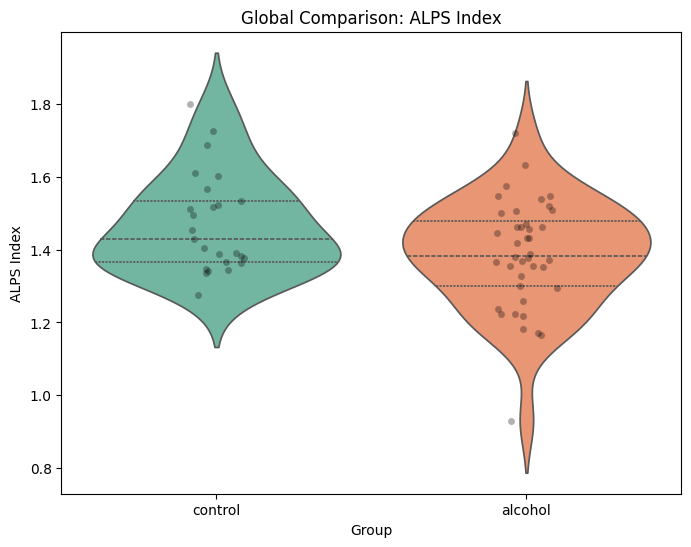


Generating Plot 2: Abstinence Effect (6-month Cutoff)...


/tmp/ipykernel_21212/3858985990.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot_6, x='plot_group_6', y='alps', order=order_6, palette="coolwarm", inner="quart")


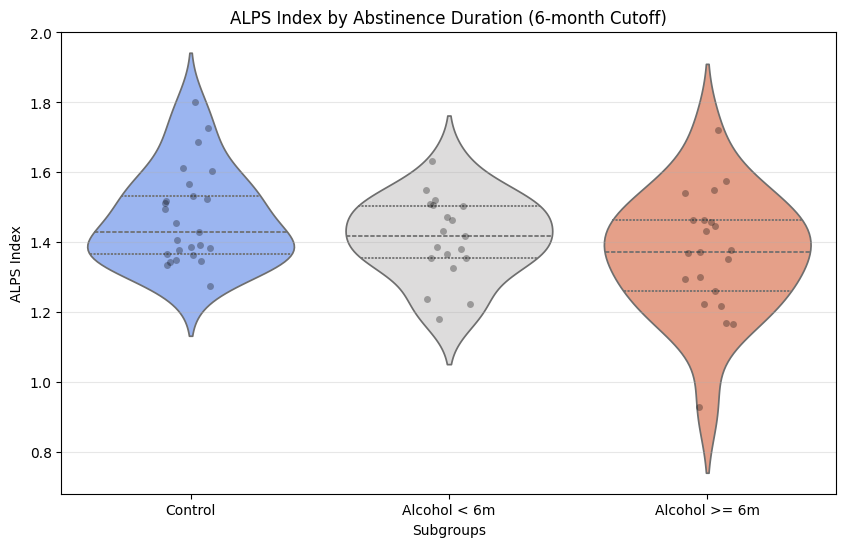


Generating Plot 3: Abstinence Effect (2-month Cutoff)...


/tmp/ipykernel_21212/3858985990.py:199: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot_2, x='plot_group_2', y='alps', order=order_2, palette="viridis", inner="quart")


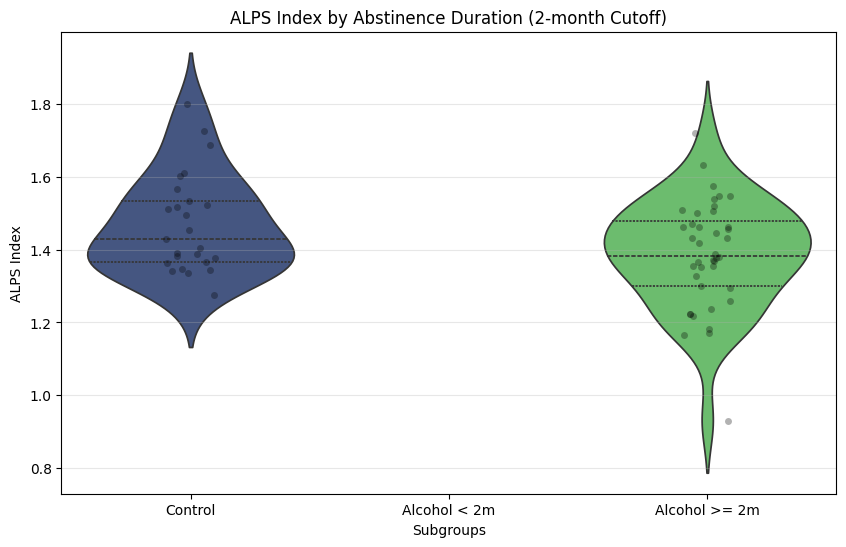

In [7]:
def format_val(val, decimals):
    return f"{val:.{decimals}f}"

# ==========================================
# INITIAL CONFIGURATION
# ==========================================
col_group = 'group'
col_session = 'session'
col_abst = 'abstinence'
col_value = 'alps'

print("=== DATA PREPARATION (SESSION 1) ===")

# Filter for Session 1 only
df_s1 = df[df[col_session] == 1].copy()

# Convert abstinence to numeric (errors='coerce' turns 'control' strings into NaN)
df_s1['abstinence_num'] = pd.to_numeric(df_s1[col_abst], errors='coerce')

# Define masks for main groups
mask_control = df_s1[col_group] == 'control'
mask_alcohol = df_s1[col_group] == 'alcohol'

# ==========================================
# DEFINE SUBGROUPS AND COMPARISONS
# ==========================================
comparisons = [
    {
        "name": "1. Control vs Alcohol (Total)",
        "g1_mask": mask_control,
        "g2_mask": mask_alcohol
    },
    {
        "name": "2. Control vs Abst <= 6",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] <= 6)
    },
    {
        "name": "3. Control vs Abst >= 6",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] >= 6)
    },
    {
        "name": "4. Control vs Abst <= 2",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] <= 2)
    },
    {
        "name": "5. Control vs Abst >= 2",
        "g1_mask": mask_control,
        "g2_mask": (mask_alcohol) & (df_s1['abstinence_num'] >= 2)
    }
]

# Variables to analyze
variables = ['alps', 'alps_L', 'alps_R']
# If you want to include raw DTI metrics, add them here:
variables += ['x_proj_L', 'x_assoc_L', 'y_proj_L', 'z_assoc_L', 'x_proj_R', 'x_assoc_R', 'y_proj_R', 'z_assoc_R']

# ==========================================
# STATISTICAL ANALYSIS LOOP
# ==========================================
results = []

print(f"Analyzing {len(variables)} variables across {len(comparisons)} comparisons...")

# Ensure the variables we will analyze are numeric (coerce unparseable values to NaN)
for v in variables:
    df_s1[v] = pd.to_numeric(df_s1[v], errors='coerce')

for var in variables:
    for comp in comparisons:
        # A) Extract Data (now numeric)
        data_c = df_s1.loc[comp['g1_mask'], var].dropna().astype(float)   # Control Group (Reference)
        data_alc = df_s1.loc[comp['g2_mask'], var].dropna().astype(float) # Experimental Group

        # Validate N (Sample size)
        n_c, n_alc = len(data_c), len(data_alc)
        if n_c < 2 or n_alc < 2:
            continue  # Skip if not enough data points

        # B) Mann-Whitney U (Non-parametric - Robust)
        # SciPy may raise errors if inputs are not numeric; ensure they're float arrays
        u_stat, p_u = stats.mannwhitneyu(data_c.values, data_alc.values)

        # C) T-Test (Welch's - as requested in secondary script)
        t_stat, p_t = stats.ttest_ind(data_c.values, data_alc.values, equal_var=False)

        # D) Cohen's d (Effect Size)
        mean_c, mean_alc = data_c.mean(), data_alc.mean()
        sd_c, sd_alc = data_c.std(ddof=1), data_alc.std(ddof=1)

        # Pooled SD Calculation
        # Ensure we don't divide by zero if one group has N=1 (std undefined or 0)
        if (n_c + n_alc - 2) > 0 and (n_c > 1 and n_alc > 1):
            sd_pooled = np.sqrt(((n_c - 1) * sd_c**2 + (n_alc - 1) * sd_alc**2) / (n_c + n_alc - 2))
        else:
            # If pooled SD can't be calculated meaningfully, default to NaN
            sd_pooled = np.nan

        # Avoid division by zero
        if pd.isna(sd_pooled) or sd_pooled == 0:
            cohen_d = 0.0
        else:
            cohen_d = (mean_c - mean_alc) / sd_pooled

        def get_sig_stars(p):
            if p < 0.001: return '***'
            elif p < 0.01: return '**'
            elif p < 0.05: return '*'
            else: return ''

        p_min = min(p_u, p_t)
        sig_label = get_sig_stars(p_min)

        results.append({
            'Variable': var,
            'Comparison': comp['name'],
            'N (Ctrl/Alc)': f"{n_c}/{n_alc}",
            'Mean Ctrl': format_val(mean_c, 5),
            'Mean Alc': format_val(mean_alc, 5),
            'P-Val (M-W)': format_val(p_u, 5),
            'P-Val (T-T)': format_val(p_t, 5),
            'Cohen\'s d': round(cohen_d, 4),
            'Sig?': sig_label
        })

# ==========================================
# DISPLAY RESULTS TABLE
# ==========================================
res_df = pd.DataFrame(results)
print("\n=== DETAILED STATISTICAL SUMMARY ===")

try:
    from tabulate import tabulate
    # Print table per variable for readability
    for var in variables:
        print(f"\n--- Results for: {var} ---")
        subset = res_df[res_df['Variable'] == var].drop(columns=['Variable'])
        print(tabulate(subset, headers='keys', tablefmt='github', showindex=False))
except ImportError:
    print(res_df)

# ==========================================
# VISUALIZATION
# ==========================================

# --- Plot A: Classic Control vs Alcohol (Global) ---
print("\nGenerating Plot 1: Control vs Alcohol (Global)...")
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_s1, x=col_group, y='alps', palette="Set2", inner="quart")
sns.stripplot(data=df_s1, x=col_group, y='alps', color='black', alpha=0.3)
plt.title('Global Comparison: ALPS Index')
plt.xlabel('Group')
plt.ylabel('ALPS Index')
plt.show()

# --- Plot B: Abstinence Breakdown (6-month Cutoff) ---
# Create temporary category column for plotting
conditions = [
    (df_s1[col_group] == 'control'),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] < 6),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] >= 6)
]
choices = ['Control', 'Alcohol < 6m', 'Alcohol >= 6m']
df_s1['plot_group_6'] = np.select(conditions, choices, default=None) # Changed default=np.nan to default=None

# Filter NaNs (cases that don't fit clean categories)
df_plot_6 = df_s1.dropna(subset=['plot_group_6'])

print("\nGenerating Plot 2: Abstinence Effect (6-month Cutoff)...")
plt.figure(figsize=(10, 6))
# Specific order to visualize progression
order_6 = ['Control', 'Alcohol < 6m', 'Alcohol >= 6m']

sns.violinplot(data=df_plot_6, x='plot_group_6', y='alps', order=order_6, palette="coolwarm", inner="quart")
sns.stripplot(data=df_plot_6, x='plot_group_6', y='alps', order=order_6, color='black', alpha=0.3)

plt.title('ALPS Index by Abstinence Duration (6-month Cutoff)')
plt.ylabel('ALPS Index')
plt.xlabel('Subgroups')
plt.grid(axis='y', alpha=0.3)
plt.show()

# --- Plot C: Abstinence Breakdown (2-month Cutoff) ---
conditions_2 = [
    (df_s1[col_group] == 'control'),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] < 2),
    (df_s1[col_group] == 'alcohol') & (df_s1['abstinence_num'] >= 2)
]
choices_2 = ['Control', 'Alcohol < 2m', 'Alcohol >= 2m']
df_s1['plot_group_2'] = np.select(conditions_2, choices_2, default=None) # Changed default=np.nan to default=None
df_plot_2 = df_s1.dropna(subset=['plot_group_2'])

print("\nGenerating Plot 3: Abstinence Effect (2-month Cutoff)...")
plt.figure(figsize=(10, 6))
order_2 = ['Control', 'Alcohol < 2m', 'Alcohol >= 2m']

sns.violinplot(data=df_plot_2, x='plot_group_2', y='alps', order=order_2, palette="viridis", inner="quart")
sns.stripplot(data=df_plot_2, x='plot_group_2', y='alps', order=order_2, color='black', alpha=0.3)

plt.title('ALPS Index by Abstinence Duration (2-month Cutoff)')
plt.ylabel('ALPS Index')
plt.xlabel('Subgroups')
plt.grid(axis='y', alpha=0.3)
plt.show()